In [76]:
import numpy as np
from scipy.special import expi
dx=.1

a=0
b=4
c=10
d=15
e=20

x=np.arange(0,e,dx)

sigma_t_fuel=0.415
sigma_t_reflector=0.371
sigma_t_absorber=0.371


gradx=np.gradient(x)


def tau(i,j):

    s=0
    if i<j:
        if (x[i]>=a and x[i]<=b) or (x[i]>=c and x[i]<=d):
            #then it's in fuel region
            s=sigma_t_fuel*dx/2
        if (x[i]>b and x[i]<c) or (x[i]>d and x[i]<=e):
            s=sigma_t_reflector*dx/2

        k=i+1
        while k<j-1:
            if (x[k]>=a and x[i]<=b) or (x[k]>=c and x[k]<=d):
                 #then it's in fuel region
                s=s+sigma_t_fuel*dx
            if (x[k]>b and x[k]<c) or (x[k]>d and x[k]<=e):
                s=s+sigma_t_reflector*dx           
            k=k+1

        if (x[j]>=a and x[j]<=b) or (x[j]>=c and x[j]<=d):
            #then it's in fuel region
            s=s+sigma_t_fuel*dx/2
        if (x[j]>b and x[j]<c) or (x[j]>d and x[j]<=e):
            s=s+sigma_t_reflector*dx/2


    elif j<i:

        if (x[j]>=a and x[j]<=b) or (x[j]>=c and x[j]<=d):
            #then it's in fuel region
            s=sigma_t_fuel*dx/2
        if (x[j]>b and x[j]<c) or (x[j]>d and x[j]<=e):
            s=sigma_t_reflector*dx/2

        

        k=j+1
        while k<i-1:
            if (x[k]>=a and x[i]<=b) or (x[k]>=c and x[k]<=d):
                 #then it's in fuel region
                s=s+sigma_t_fuel*dx
            if (x[k]>b and x[k]<c) or (x[k]>d and x[k]<=e):
                s=s+sigma_t_reflector*dx           
            k=k+1


        if (x[i]>=a and x[i]<=b) or (x[i]>=c and x[i]<=d):
            #then it's in fuel region
            s=s+sigma_t_fuel*dx/2
        if (x[i]>b and x[i]<c) or (x[i]>d and x[i]<=e):
            s=s+sigma_t_reflector*dx/2

        
    elif i==j:

        if (x[i]>=a and x[i]<=b) or (x[i]>=c and x[i]<=d):
            #then it's in fuel region
            s=sigma_t_fuel*dx/2
        if (x[i]>b and x[i]<c) or (x[i]>d and x[i]<=e):
            s=sigma_t_reflector*dx/2

    return s 

  
def E(x):
    dx=0.001
    meu=np.arange(0.0001,1,dx)
    f=meu*np.exp(-x/meu)
    val=np.trapz(f,meu,dx=dx)
    #val=np.exp(-x)/3 - x*np.exp(-x)/6 +x**2*np.exp(-x)/6 +x**3*expi(-x)
    return val
matrix=np.zeros((len(x),len(x)))

for i in range(len(x)):
    val=0
    
    for j in range(len(x)):
        if i!=j:
            if (x[i]>=a and x[i]<=b) or (x[i]>=c and x[i]<=d):
            #then it's in fuel region
                val=(E(tau(i,j))-E((tau(i,j)+tau(i,i)))-E((tau(i,j)+tau(j,j)))+E((tau(i,j)+tau(i,i)+tau(j,j))))/(2*sigma_t_fuel*gradx[i])
            if (x[i]>b and x[i]<c) or (x[i]>d and x[i]<=e):
                val=(E(tau(i,j))-E((tau(i,j)+tau(i,i)))-E((tau(i,j)+tau(j,j)))+E((tau(i,j)+tau(i,i)+tau(j,j))))/(2*sigma_t_reflector*gradx[i])
            

        if i==j:
            if (x[i]>=a and x[i]<=b) or (x[i]>=c and x[i]<=d):
                val=(sigma_t_fuel*gradx[i])*((1-(1-2*E(tau(i,i))))/(2*sigma_t_fuel*gradx[i]))
            if (x[i]>b and x[i]<c) or (x[i]>d and x[i]<=e):
                val=(sigma_t_fuel*gradx[i])*((1-(1-2*E(tau(i,i))))/(2*sigma_t_reflector*gradx[i]))

        matrix[i][j]=val
matrix

array([[4.79403374e-01, 1.17719203e-02, 1.17719203e-02, ...,
        2.15488932e-09, 1.97977973e-09, 1.81896726e-09],
       [1.17719203e-02, 4.79403374e-01, 1.17719203e-02, ...,
        2.25354292e-09, 2.07037566e-09, 1.90216718e-09],
       [1.17719203e-02, 1.17719203e-02, 4.79403374e-01, ...,
        2.35673782e-09, 2.16513985e-09, 1.98919313e-09],
       ...,
       [1.78571777e-06, 1.78571777e-06, 1.78571777e-06, ...,
        5.38507663e-01, 1.10138346e-02, 1.10138346e-02],
       [1.71131869e-06, 1.71131869e-06, 1.71131869e-06, ...,
        1.10138346e-02, 5.38507663e-01, 1.10138346e-02],
       [1.64006841e-06, 1.64006841e-06, 1.64006841e-06, ...,
        1.10138346e-02, 1.10138346e-02, 5.38507663e-01]])

In [86]:
sigma_s=0.334
sigma_s_r=0.334
neu_sigma_f=.178

In [87]:
m,n=np.shape(matrix)
scatteering_matrix=np.zeros((m,n))
neu_sigma_f_matrix=np.zeros((m,n))

for i in range(m):     
    if x[i]>=a and x[i]<=b:
        scatteering_matrix[i][i]=sigma_s
        neu_sigma_f_matrix[i][i]=neu_sigma_f
    if x[i]>b and x[i]<c:
        scatteering_matrix[i][i]=sigma_s_r
        

    if x[i]>=c and x[i]<=d:
        scatteering_matrix[i][i]=sigma_s
        neu_sigma_f_matrix[i][i]=neu_sigma_f
    if x[i]>d and x[i]<=e:
        scatteering_matrix[i][i]=sigma_s_r
        


In [105]:
phi0=np.ones((m,1))
source=np.ones_like(phi0)*1
k0=1
k=[]
for i in range(300):
    k.append(k0)
    phi1=np.matmul(matrix,np.matmul(scatteering_matrix,phi0)+np.matmul(neu_sigma_f_matrix,phi0)/(k0)+source)
    k0=k0*np.sum(np.matmul(neu_sigma_f_matrix,phi1))/np.sum(np.matmul(neu_sigma_f_matrix,phi0))
    phi0=phi1.copy()

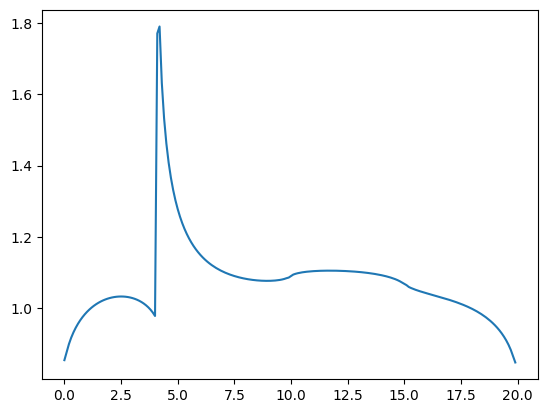

In [106]:
import matplotlib.pyplot as plt
plt.plot(x,phi1)

In [107]:
k0

1.052621485173176